In [5]:
# Credits: https://github.com/keras-team/keras/blob/master/examples/mnist_cnn.py

from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

batch_size = 128
num_classes = 10
epochs = 12

# input image dimensions
img_rows, img_cols = 28, 28

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

history =  model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples
Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 4s 70us/step - loss: 0.2711 - acc: 0.9154 - val_loss: 0.0582 - val_acc: 0.9813
Epoch 2/12
60000/60000 [==============================] - 4s 61us/step - loss: 0.0902 - acc: 0.9736 - val_loss: 0.0425 - val_acc: 0.9850
Epoch 3/12
60000/60000 [==============================] - 4s 61us/step - loss: 0.0681 - acc: 0.9797 - val_loss: 0.0354 - val_acc: 0.9879
Epoch 4/12
60000/60000 [==============================] - 4s 60us/step - loss: 0.0560 - acc: 0.9833 - val_loss: 0.0327 - val_acc: 0.9890
Epoch 5/12
60000/60000 [==============================] - 4s 60us/step - loss: 0.0484 - acc: 0.9860 - val_loss: 0.0292 - val_acc: 0.9902
Epoch 6/12
60000/60000 [==============================] - 4s 61us/step - loss: 0.0419 - acc: 0.9873 - val_loss: 0.0309 - val_acc: 0.9901
Epoch 7/12
60000/60000 [==============================]

In [7]:
def plt_dynamic(x, vy, ty, ax, colors=['b']):
    ax.plot(x, vy, 'b', label="Validation Loss")
    ax.plot(x, ty, 'r', label="Train Loss")
    plt.legend()
    plt.grid()
    fig.canvas.draw()

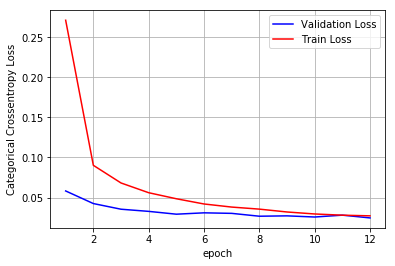

In [8]:
import matplotlib.pyplot as plt

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,epochs+1))

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

## <center> Assignment </center>

### Model 1:

Architecture:-<br>
Input (28,28,1) **->** <br>(3, 3) Conv, 32 **->** (3, 3) Conv, 64 **->** Pool/2 **->** <br>(3, 3) Conv, 128 **->** <br>Dropout (0.3) **->** Flatten **->** Dense, 256 **->** Dropout (0.5) **->** Softmax

In [12]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape, padding='same'))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2,2)))
model.add(Conv2D(128, kernel_size=(3, 3),activation='relu', padding='same'))
model.add(Dropout(0.30))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, verbose=1,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 7s 122us/step - loss: 0.2073 - acc: 0.9366 - val_loss: 0.0441 - val_acc: 0.9850
Epoch 2/12
60000/60000 [==============================] - 6s 106us/step - loss: 0.0603 - acc: 0.9820 - val_loss: 0.0313 - val_acc: 0.9885
Epoch 3/12
60000/60000 [==============================] - 6s 106us/step - loss: 0.0413 - acc: 0.9871 - val_loss: 0.0281 - val_acc: 0.9908
Epoch 4/12
60000/60000 [==============================] - 6s 104us/step - loss: 0.0333 - acc: 0.9890 - val_loss: 0.0240 - val_acc: 0.9916
Epoch 5/12
60000/60000 [==============================] - 6s 105us/step - loss: 0.0267 - acc: 0.9920 - val_loss: 0.0300 - val_acc: 0.9900
Epoch 6/12
60000/60000 [==============================] - 6s 104us/step - loss: 0.0225 - acc: 0.9928 - val_loss: 0.0233 - val_acc: 0.9920
Epoch 7/12
60000/60000 [==============================] - 6s 104us/step - loss: 0.0190 - acc: 0.9940 - val_loss: 0.0232 - 

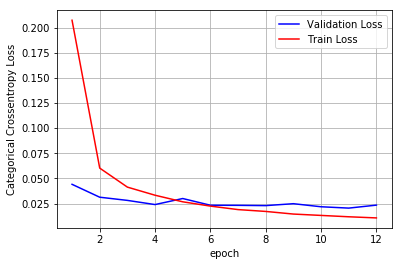

In [13]:
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,epochs+1))

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

### Model 2:

Architecture:-<br>
Input (28,28,1) **->** <br>(5, 5) Conv, 32 **->** (5, 5) Conv, 64 **->** Pool/2 **->** <br>(5, 5) Conv, 96 **->** (5, 5) Conv, 128 **->** (5, 5) Conv, 224 **->** <br>Dropout (0.3) **->** Flatten **->** Dense, 256 **->** Dropout (0.5) **->** Softmax

In [14]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(5, 5), activation='relu', input_shape=input_shape, padding='same'))
model.add(Conv2D(64, (5, 5), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2,2)))
model.add(Conv2D(96, kernel_size=(5, 5),activation='relu', padding='same'))
model.add(Conv2D(128, (5, 5), activation='relu', padding='same'))
model.add(Conv2D(224, kernel_size=(5, 5),activation='relu', padding='same'))
model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, verbose=1,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 15s 252us/step - loss: 0.2645 - acc: 0.9181 - val_loss: 0.0459 - val_acc: 0.9866
Epoch 2/12
60000/60000 [==============================] - 13s 217us/step - loss: 0.0502 - acc: 0.9852 - val_loss: 0.0289 - val_acc: 0.9911
Epoch 3/12
60000/60000 [==============================] - 13s 217us/step - loss: 0.0340 - acc: 0.9902 - val_loss: 0.0217 - val_acc: 0.9937
Epoch 4/12
60000/60000 [==============================] - 13s 218us/step - loss: 0.0277 - acc: 0.9919 - val_loss: 0.0187 - val_acc: 0.9943
Epoch 5/12
60000/60000 [==============================] - 13s 216us/step - loss: 0.0204 - acc: 0.9941 - val_loss: 0.0345 - val_acc: 0.9908
Epoch 6/12
60000/60000 [==============================] - 13s 216us/step - loss: 0.0168 - acc: 0.9951 - val_loss: 0.0171 - val_acc: 0.9950
Epoch 7/12
60000/60000 [==============================] - 13s 219us/step - loss: 0.0136 - acc: 0.9959 - val_loss: 0.

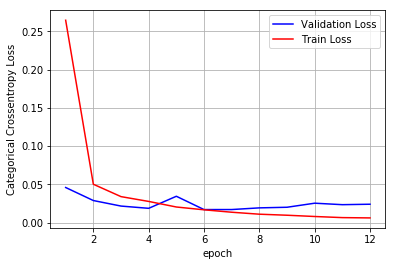

In [15]:
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,epochs+1))

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

### Model 3:

Architecture:-<br>
Input (28,28,1) **->** <br>(7, 7) Conv, 32 **->** (7, 7) Conv, 64 **->** Pool/2 **->** <br>(7, 7) Conv, 96 **->** (7, 7) Conv, 128 **->** Pool/2 **->** <br>(7, 7) Conv, 224 **->** (7, 7) Conv, 256 **->** (7, 7) Conv, 256 **->** <br>Dropout (0.3) **->** Flatten **->** Dense, 256 **->** Dropout (0.5) **->** Softmax

In [18]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(7, 7), activation='relu', input_shape=input_shape, padding='same'))
model.add(Conv2D(64, (7, 7), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2,2)))
model.add(Conv2D(96, kernel_size=(7, 7),activation='relu', padding='same'))
model.add(Conv2D(128, (7, 7), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2,2)))
model.add(Conv2D(224, kernel_size=(7, 7),activation='relu', padding='same'))
model.add(Conv2D(512, kernel_size=(7, 7),activation='relu', padding='same'))
model.add(Conv2D(512, kernel_size=(7, 7),activation='relu', padding='same'))
model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, verbose=1,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 35s 590us/step - loss: 0.5922 - acc: 0.8037 - val_loss: 0.0546 - val_acc: 0.9836
Epoch 2/12
60000/60000 [==============================] - 32s 535us/step - loss: 0.0598 - acc: 0.9836 - val_loss: 0.0357 - val_acc: 0.9905
Epoch 3/12
60000/60000 [==============================] - 32s 534us/step - loss: 0.0368 - acc: 0.9898 - val_loss: 0.0261 - val_acc: 0.9914
Epoch 4/12
60000/60000 [==============================] - 32s 533us/step - loss: 0.0250 - acc: 0.9930 - val_loss: 0.0221 - val_acc: 0.9931
Epoch 5/12
60000/60000 [==============================] - 32s 534us/step - loss: 0.0190 - acc: 0.9948 - val_loss: 0.0295 - val_acc: 0.9918
Epoch 6/12
60000/60000 [==============================] - 32s 533us/step - loss: 0.0139 - acc: 0.9960 - val_loss: 0.0198 - val_acc: 0.9942
Epoch 7/12
60000/60000 [==============================] - 32s 535us/step - loss: 0.0098 - acc: 0.9974 - val_loss: 0.

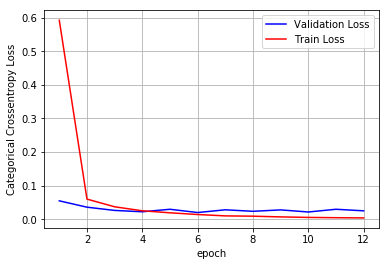

In [19]:
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,epochs+1))

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

### Conclustion:

In [20]:
from prettytable import PrettyTable

table = PrettyTable()
table.field_names = ['# Conv Layers', 'Filter Size', 'Test Loss', 'Test Accuracy']
table.add_row([3, '(3, 3)', 0.0234, 0.94])
table.add_row([5, '(5, 5)', 0.0240, 0.94])
table.add_row([7, '(7, 7)', 0.0248, 0.94])
print(table)

+---------------+-------------+-----------+---------------+
| # Conv Layers | Filter Size | Test Loss | Test Accuracy |
+---------------+-------------+-----------+---------------+
|       3       |    (3, 3)   |   0.0234  |      0.94     |
|       5       |    (5, 5)   |   0.024   |      0.94     |
|       7       |    (7, 7)   |   0.0248  |      0.94     |
+---------------+-------------+-----------+---------------+
